## Exploratory Data Analysis on the dataset scraped

1. Merging all four datasets
2. Checking for null, duplicated values
3. Visualisations to understand the correlation between the data
4. Text Pre-processing
5. Combining all columns into one to pass as text chunks to the LLM

### 1. Merging the datasets

In [25]:
import pandas as pd

# Reading all four csv datasets
df1 = pd.read_csv('free_games.csv')
df2 = pd.read_csv('grossing_games.csv')
df3 = pd.read_csv('best_games.csv')
df4 = pd.read_csv('paid_games.csv')

In [26]:
# Merging the dataframes into one

df = pd.concat([df1, df2, df3, df4], ignore_index = True)
copy_df = df.copy()

In [27]:
df.head()

,name,package_name,description,icon_url,genre,rating,ratings
0,Call of Duty: Mobile Season 5,com.activision.callofduty.shooter,"It's CALL OF DUTY® and more, like you never se...",https://play-lh.googleusercontent.com/zX7jmUbn...,Action,4.306470,"100,000,000+"
1,Roblox,com.roblox.client,Roblox is the ultimate virtual universe that l...,https://play-lh.googleusercontent.com/WNWZaxi9...,Adventure,4.436438,"500,000,000+"
2,Free Fire,com.dts.freefireth,[Mechadrake Incoming]\r\nThe fierce Mechadrake...,https://play-lh.googleusercontent.com/pGTbyodN...,Action,4.142490,"1,000,000,000+"
3,Clash of Clans,com.supercell.clashofclans,Join millions of players worldwide as you buil...,https://play-lh.googleusercontent.com/LByrur1m...,Strategy,4.530824,"500,000,000+"
4,Free Fire MAX,com.dts.freefiremax,[Mechadrake Incoming]\r\nThe fierce Mechadrake...,https://play-lh.googleusercontent.com/T8RuSQDF...,Action,4.176982,"100,000,000+"


### 2. Checking for null and duplicated values

In [6]:
# Cout and Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          120 non-null    object 
 1   package_name  120 non-null    object 
 2   description   120 non-null    object 
 3   icon_url      120 non-null    object 
 4   genre         120 non-null    object 
 5   rating        120 non-null    float64
 6   ratings       120 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.7+ KB


In [7]:
# Statistics of numerical columns
df.describe()

,rating
count,120.000000
mean,4.388758
std,0.360555
min,2.273083
25%,4.296898
50%,4.469230
75%,4.583960
max,4.925695


In [8]:
# Checking if null values are present in the dataset
df.isna().sum()

name            0
package_name    0
description     0
icon_url        0
genre           0
rating          0
ratings         0
dtype: int64

In [10]:
# Checking if duplicated values are present in the dataset
df.duplicated().sum()

24

In [14]:
# Filtering out the duplicated rows. Duplication is present due to genres and some words 
# matching in the descriptions hence it's fine to keep the duplicated values
df[df.duplicated()]

,name,package_name,description,icon_url,genre,rating,ratings
30,Pokémon GO,com.nianticlabs.pokemongo,New! Now you can battle other Pokémon GO Train...,https://play-lh.googleusercontent.com/6qUR3CmT...,Adventure,3.988406,"100,000,000+"
37,MONOPOLY GO!,com.scopely.monopolygo,"Hit GO! Roll the dice! Earn MONOPOLY money, in...",https://play-lh.googleusercontent.com/DfYkSl-n...,Board,4.464840,"50,000,000+"
38,Mario Kart Tour,com.nintendo.zaka,■Challenge players worldwide in multiplayer!\r...,https://play-lh.googleusercontent.com/Nhdcc77M...,Action,4.306480,"100,000,000+"
39,Roblox,com.roblox.client,Roblox is the ultimate virtual universe that l...,https://play-lh.googleusercontent.com/WNWZaxi9...,Adventure,4.436438,"500,000,000+"
42,Hungry Shark Evolution,com.fgol.HungrySharkEvolution,The Official game for <b>Shark Week</b> - Welc...,https://play-lh.googleusercontent.com/6Ij3BrGO...,Arcade,4.469230,"500,000,000+"
45,Clash of Clans,com.supercell.clashofclans,Join millions of players worldwide as you buil...,https://play-lh.googleusercontent.com/LByrur1m...,Strategy,4.530824,"500,000,000+"
46,8 Ball Pool,com.miniclip.eightballpool,Do you want to play in the world of pool games...,https://play-lh.googleusercontent.com/bPz1guJ6...,Sports,4.542642,"1,000,000,000+"
52,Subway Surfers,com.kiloo.subwaysurf,DASH as fast as you can! \r\nDODGE the oncomin...,https://play-lh.googleusercontent.com/ykHUp1lJ...,Arcade,4.580597,"1,000,000,000+"
54,Plants vs. Zombies™,com.ea.game.pvzfree_row,Get ready to soil your plants as a mob of fun-...,https://play-lh.googleusercontent.com/hO7716hh...,Strategy,4.177529,"500,000,000+"
57,Call of Duty: Mobile Season 5,com.activision.callofduty.shooter,"It's CALL OF DUTY® and more, like you never se...",https://play-lh.googleusercontent.com/zX7jmUbn...,Action,4.306470,"100,000,000+"


In [11]:
df.columns

Index(['name', 'package_name', 'description', 'icon_url', 'genre', 'rating',
       'ratings'],
      dtype='object')

### 3. Visualization of data

C:\Users\atmik shetty\AppData\Local\Temp\ipykernel_6720\2783664093.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_10, palette='rocket')


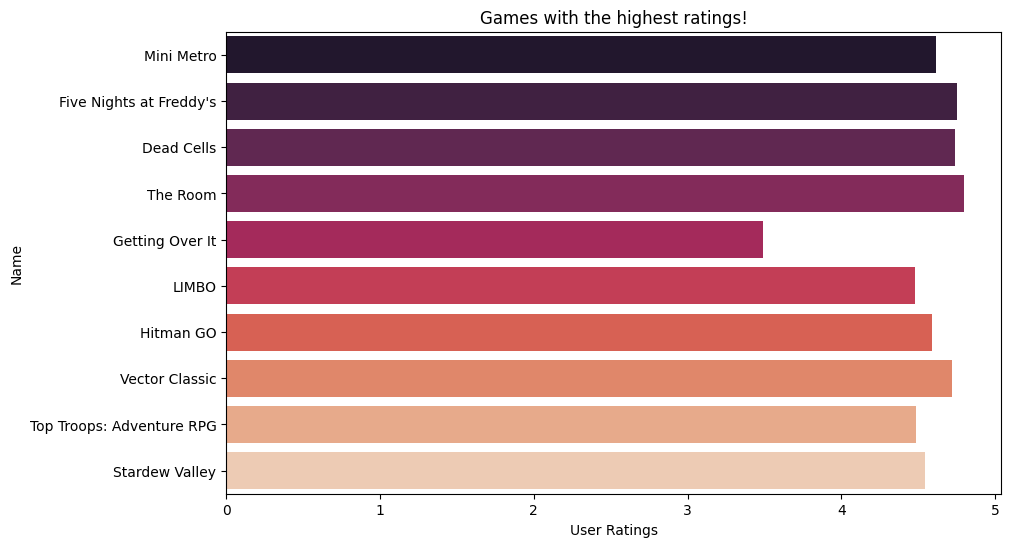

'\nFrom the above visualization we notice that the Adventure, RPG and Action games are highly rated\n'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the Top 10 rated games on Play Store
df_sorted = df.sort_values(by='ratings', ascending=True)
top_10 = df_sorted.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='name', data=top_10, palette='rocket')
plt.title("Games with the highest ratings!")
plt.xlabel('User Ratings')
plt.ylabel('Name')
plt.show()

"""
From the above visualization we notice that the Adventure, RPG and Action games are highly rated
"""

C:\Users\atmik shetty\AppData\Local\Temp\ipykernel_6720\2897068040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df, palette='mako', order=df['genre'].value_counts().index)


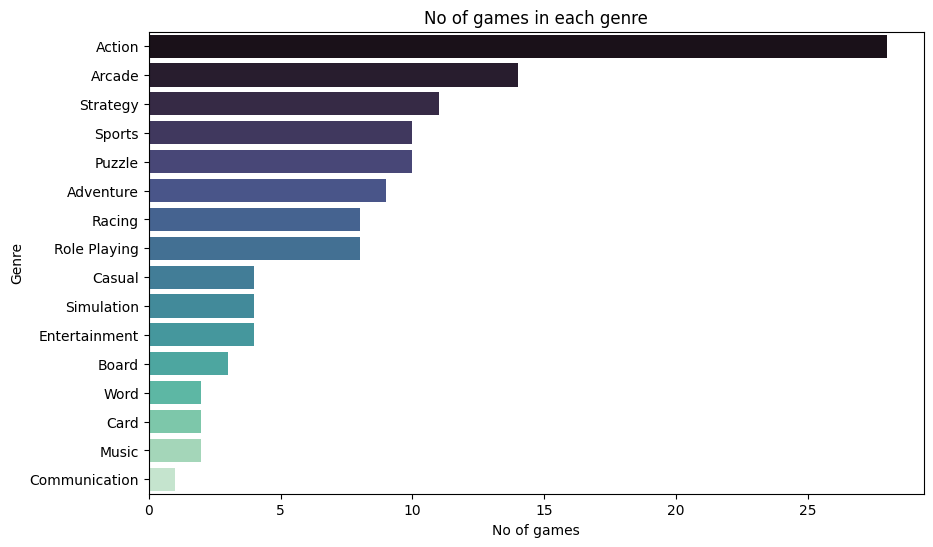

'\nFrom the above plot we can notice that, the action games are present a lot in the datasets meaning in the grossing as well as other\ndatasets the action games are highly rated.\n'

In [25]:
# Checking the Amount of games in each visualization

plt.figure(figsize=(10,6))
sns.countplot(y='genre', data=df, palette='mako', order=df['genre'].value_counts().index)
plt.title("No of games in each genre")
plt.xlabel("No of games")
plt.ylabel("Genre")
plt.show()

"""
From the above plot we can notice that, the action games are present a lot in the datasets meaning in the grossing as well as other
datasets the action games are highly rated.
"""

### 4. Text Pre-processing

In [28]:
# using the Natural Language Toolkit for Text Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
# Used for lemmatization and stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\atmik
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\atmik
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\atmik
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# Fixing the ratings columns since it has a '+' special character which might cause issues

df['ratings'] = df['ratings'].str.replace(r'[^\d.]', '', regex=True).astype(float)
df.head(2)

,name,package_name,description,icon_url,genre,rating,ratings
0,Call of Duty: Mobile Season 5,com.activision.callofduty.shooter,"It's CALL OF DUTY® and more, like you never se...",https://play-lh.googleusercontent.com/zX7jmUbn...,Action,4.306470,100000000.0
1,Roblox,com.roblox.client,Roblox is the ultimate virtual universe that l...,https://play-lh.googleusercontent.com/WNWZaxi9...,Adventure,4.436438,500000000.0


In [31]:
# Initializing the lemmatizer and stop_words variables

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [32]:
# A function to pre-process text from the descripton column since it is useful context for Large Langauge Models

def text_preprocess(text):

    # Tokenization using Word Tokenizer
    tokens = word_tokenize(text)

    # Removing stop words and uneccessary words
    useful_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 1]

    # Performing Text Lemmatization
    lemma_tokens = [lemmatizer.lemmatize(word) for word in useful_tokens]

    return " ".join(lemma_tokens)

In [33]:
# Applying the text preprocessing function on the description column

df["desc"] = df['description'].apply(text_preprocess)

In [34]:
# Text preprocessing has been successfully performed
df['desc']

0      's call duty® like never seen famous fps multi...
1      roblox ultimate virtual universe let create sh...
2      mechadrake incoming fierce mechadrake invaded ...
3      join million player worldwide build village ra...
4      mechadrake incoming fierce mechadrake invaded ...
                             ...                        
115    form team battle victory capture train evolve ...
116    warned game tutorial part challenge figuring p...
117    enter room old sin transported place tactile e...
118    join mistplay free get reward go beyond game /...
119    eternium beautifully crafted action rpg remini...
Name: desc, Length: 120, dtype: object

In [35]:
# We do not need our original description column now, hence we drop it
df.drop('description', axis=1, inplace=True)

In [36]:
df.head(2)

,name,package_name,icon_url,genre,rating,ratings,desc
0,Call of Duty: Mobile Season 5,com.activision.callofduty.shooter,https://play-lh.googleusercontent.com/zX7jmUbn...,Action,4.306470,100000000.0,'s call duty® like never seen famous fps multi...
1,Roblox,com.roblox.client,https://play-lh.googleusercontent.com/WNWZaxi9...,Adventure,4.436438,500000000.0,roblox ultimate virtual universe let create sh...


In [37]:
# We do not need package_name, icon_url, rating and ratings columns since it will affect our Vector DB similarity score
df.drop(['package_name', 'icon_url', 'rating', 'ratings'], axis=1, inplace=True)

In [46]:
# There is a possibility that the desc text might not be clean and might consist of some special chaarcters so we apply the clean_desc function
import re

def clean_desc(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['desc'] = df['desc'].apply(clean_desc)

#### Note: Vectorization is not performed here since, LLM Embeddings will be done later, doing it here at this stage would be unnecessary

### 5. Combining all columns into one to pass as text chunks to the LLM

In [47]:
df['combined_data'] = df.apply(lambda row: f"Name: {row['name']}. Genre: {row['genre']}. Description: {row['desc']}", axis=1)

In [48]:
df.head(2)

,name,genre,desc,combined_data
0,Call of Duty: Mobile Season 5,Action,s call duty like never seen famous fps multipl...,Name: Call of Duty: Mobile Season 5. Genre: Ac...
1,Roblox,Adventure,roblox ultimate virtual universe let create sh...,Name: Roblox. Genre: Adventure. Description: r...


### Since our dataset is pre-processed and ready to be used in the application we create a csv file for it, we will only be saving the 'combined_data' column to csv

In [49]:
df[["combined_data"]].to_csv('data.csv', index=False)
print('Csv file is ready!!!')

Csv file is ready!!!


In [50]:
mock = pd.read_csv('data.csv')
mock.head(5)

,combined_data
0,Name: Call of Duty: Mobile Season 5. Genre: Ac...
1,Name: Roblox. Genre: Adventure. Description: r...
2,Name: Free Fire. Genre: Action. Description: m...
3,Name: Clash of Clans. Genre: Strategy. Descrip...
4,Name: Free Fire MAX. Genre: Action. Descriptio...
